# РК №2 Рябова В.В.

## Задание.
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

ИУ5-65Б	Метод опорных векторов	Градиентный бустинг

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('states_all.csv')

In [ ]:
data.shape

(1715, 25)

In [ ]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
(data.isnull() | data.empty | data.isna()).sum()

## Процент пропусков в каждом признаке

In [ ]:
target_column = 'AVG_READING_4_SCORE'
data = data[(data[target_column].isna() == False)]

In [ ]:
(data.isnull() | data.empty | data.isna()).sum()

In [ ]:
row_count = data.shape[0]
for key, elem in (data.isnull() | data.empty | data.isna()).sum().items():
  print(key, "{:.2f}".format(elem / row_count * 100) + "%" )

PRIMARY_KEY 0.00%
STATE 0.00%
YEAR 0.00%
ENROLL 26.00%
TOTAL_REVENUE 19.54%
FEDERAL_REVENUE 19.54%
STATE_REVENUE 19.54%
LOCAL_REVENUE 19.54%
TOTAL_EXPENDITURE 19.54%
INSTRUCTION_EXPENDITURE 19.54%
SUPPORT_SERVICES_EXPENDITURE 19.54%
OTHER_EXPENDITURE 26.00%
CAPITAL_OUTLAY_EXPENDITURE 19.54%
GRADES_PK_G 12.46%
GRADES_KG_G 11.69%
GRADES_4_G 11.69%
GRADES_8_G 11.69%
GRADES_12_G 11.69%
GRADES_1_8_G 32.15%
GRADES_9_12_G 24.31%
GRADES_ALL_G 11.69%
AVG_MATH_4_SCORE 19.85%
AVG_MATH_8_SCORE 19.85%
AVG_READING_4_SCORE 0.00%
AVG_READING_8_SCORE 13.54%


In [ ]:
row_count = data.shape[0]
columns_to_remove = []
for key, elem in (data.isnull() | data.empty | data.isna()).sum().items():
  if elem / row_count >= 0.3:
    columns_to_remove.append(key)
columns_to_remove

['GRADES_1_8_G']

In [ ]:
data_new = data.drop(columns_to_remove, axis=1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 1714
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   650 non-null    object 
 1   STATE                         650 non-null    object 
 2   YEAR                          650 non-null    int64  
 3   ENROLL                        481 non-null    float64
 4   TOTAL_REVENUE                 523 non-null    float64
 5   FEDERAL_REVENUE               523 non-null    float64
 6   STATE_REVENUE                 523 non-null    float64
 7   LOCAL_REVENUE                 523 non-null    float64
 8   TOTAL_EXPENDITURE             523 non-null    float64
 9   INSTRUCTION_EXPENDITURE       523 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  523 non-null    float64
 11  OTHER_EXPENDITURE             481 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    523 non-null    float64
 13  GRAD

## Обработка пропусков данных

In [ ]:
for column in data_new:
  if (data_new[column].isnull() | data_new[column].empty | data_new[column].isna()).sum() != 0:
    if data_new[column].dtype != 'object':
      print(column + ":", data_new[column].describe()[['mean']][0])
    else:
      print(column + ":", data_new[column].describe()[['top']][0])

ENROLL: 934450.4885654886
TOTAL_REVENUE: 9610588.969407266
FEDERAL_REVENUE: 840781.4225621414
STATE_REVENUE: 4467784.89292543
LOCAL_REVENUE: 4302022.653919694
TOTAL_EXPENDITURE: 9730734.829827916
INSTRUCTION_EXPENDITURE: 5039264.764818355
SUPPORT_SERVICES_EXPENDITURE: 2834123.634799235
OTHER_EXPENDITURE: 461512.7006237006
CAPITAL_OUTLAY_EXPENDITURE: 954404.3078393881
GRADES_PK_G: 21156.2460456942
GRADES_KG_G: 71505.45296167248
GRADES_4_G: 72367.06794425087
GRADES_8_G: 72312.85365853658
GRADES_12_G: 62889.35017421603
GRADES_9_12_G: 286875.8699186992
GRADES_ALL_G: 961249.6393728222
AVG_MATH_4_SCORE: 237.39539347408828
AVG_MATH_8_SCORE: 279.9846449136276
AVG_READING_8_SCORE: 263.55871886120997


In [ ]:
for column in data_new:
  if (data_new[column].isnull() | data_new[column].empty | data_new[column].isna()).sum() != 0:
    if data_new[column].dtype != 'object' and column != target_column:
      data_new[column].fillna(data_new[column].median(), inplace=True)

In [ ]:
(data_new.isnull() | data_new.empty | data_new.isna()).sum()

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 1714
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   650 non-null    object 
 1   STATE                         650 non-null    object 
 2   YEAR                          650 non-null    int64  
 3   ENROLL                        650 non-null    float64
 4   TOTAL_REVENUE                 650 non-null    float64
 5   FEDERAL_REVENUE               650 non-null    float64
 6   STATE_REVENUE                 650 non-null    float64
 7   LOCAL_REVENUE                 650 non-null    float64
 8   TOTAL_EXPENDITURE             650 non-null    float64
 9   INSTRUCTION_EXPENDITURE       650 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  650 non-null    float64
 11  OTHER_EXPENDITURE             650 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    650 non-null    float64
 13  GRAD

In [ ]:
category_cols = ['PRIMARY_KEY', 'STATE']
print("Количество уникальных значений\n")
for col in category_cols:
    print(f'{col}: {data_new[col].unique().size}')

Количество уникальных значений

PRIMARY_KEY: 650
STATE: 53


In [ ]:
data_new = data_new.drop(category_cols, axis=1)

In [ ]:
X_data = data_new[['YEAR',
 'ENROLL',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_ALL_G']] 
Y_data = data_new[target_column].to_list()

In [ ]:
X_data = preprocessing.normalize(X_data,axis = 0)

In [ ]:
X_data.shape

(650, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X_data, Y_data, test_size=0.3, random_state=42)

In [ ]:
data_new.isnull().sum()

## Метод опорных векторов

In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf')
SVC.fit(X_train, y_train)

SVC()

In [ ]:
f1_score(y_test, SVC.predict(X_test), average='micro')
precision_score(y_test, SVC.predict(X_test), average='micro')

0.06153846153846154

## Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=80)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(y_test, model.predict(X_test)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(y_test, model.predict(X_test)), 2)))
    print('r2_score: {}'.format(round(r2_score(y_test, model.predict(X_test)), 2)))

In [ ]:
test_model(gr_80)

mean_absolute_error: 3.57
median_absolute_error: 2.91
r2_score: 0.62


In [ ]:
from sklearn.model_selection import ShuffleSplit
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X_data, Y_data)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [ ]:
reg = gs.best_estimator_

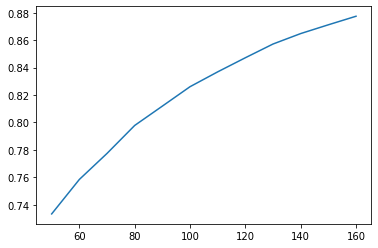

In [ ]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

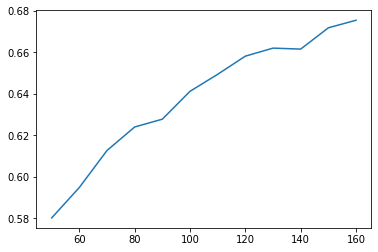

In [ ]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [ ]:
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 3.45
median_absolute_error: 2.7
r2_score: 0.61
